#**자료구조 및 알고리즘 I**

## Team project

- project to find the best subway route in seoul (line number 1 ~ 5)



- Express data using graphs

- develop a program to find the shortest path by creating a spanning tree


------
input: start station, end station

subway: (subway#, station name) -> (1, sindorim)

distance: 2 minutes from sindorim (line #1) to yeongdeungph(line #1) -> (1,sindorim), (1,yeongdeungpo),2

transfer time : line #1 sindorim to line#2 sindorim -> (1,sindorim), (2,sindorim), 2

-> 환승할 경우의 시간도 2분이라 가정

------

- Team 4

팀장: 인공지능응용학과 23102360 정아림

팀원: 인공지능응용학과 23102350 김민아, 인공지능응용학과 23102326 나영서


> **< 참고 >**



각 노선은 '노선명.txt'파일로 저장되어 있다.

ex. 1호선.txt

data 시각화 단계에서 한국어가 출력되지 않아, 영어로 번역 후 visualization 실행. 영어 번역 파일은 '노선명 영어 노선.txt'파일로 저장되어 있다.

ex. 1호선 영어 노선.txt



## **1. 데이터 시각화**

나영서: 데이터 시각화 기본틀 제공

정아림: 데이터 시각화 및 노선도 간략화, slicing 코드 오류 원인 분석

- 복잡했던 노선도 간략화 코드 제공, 코드 오류 파악 후 개선시도

김민아: data slicing 코드 오류 해결, 18개 환승역 시각화(yellow 표시)

- 영어 번역 시 '-' 발생 오류 해결, 16개만 출력되던 환승역 18개로 개선


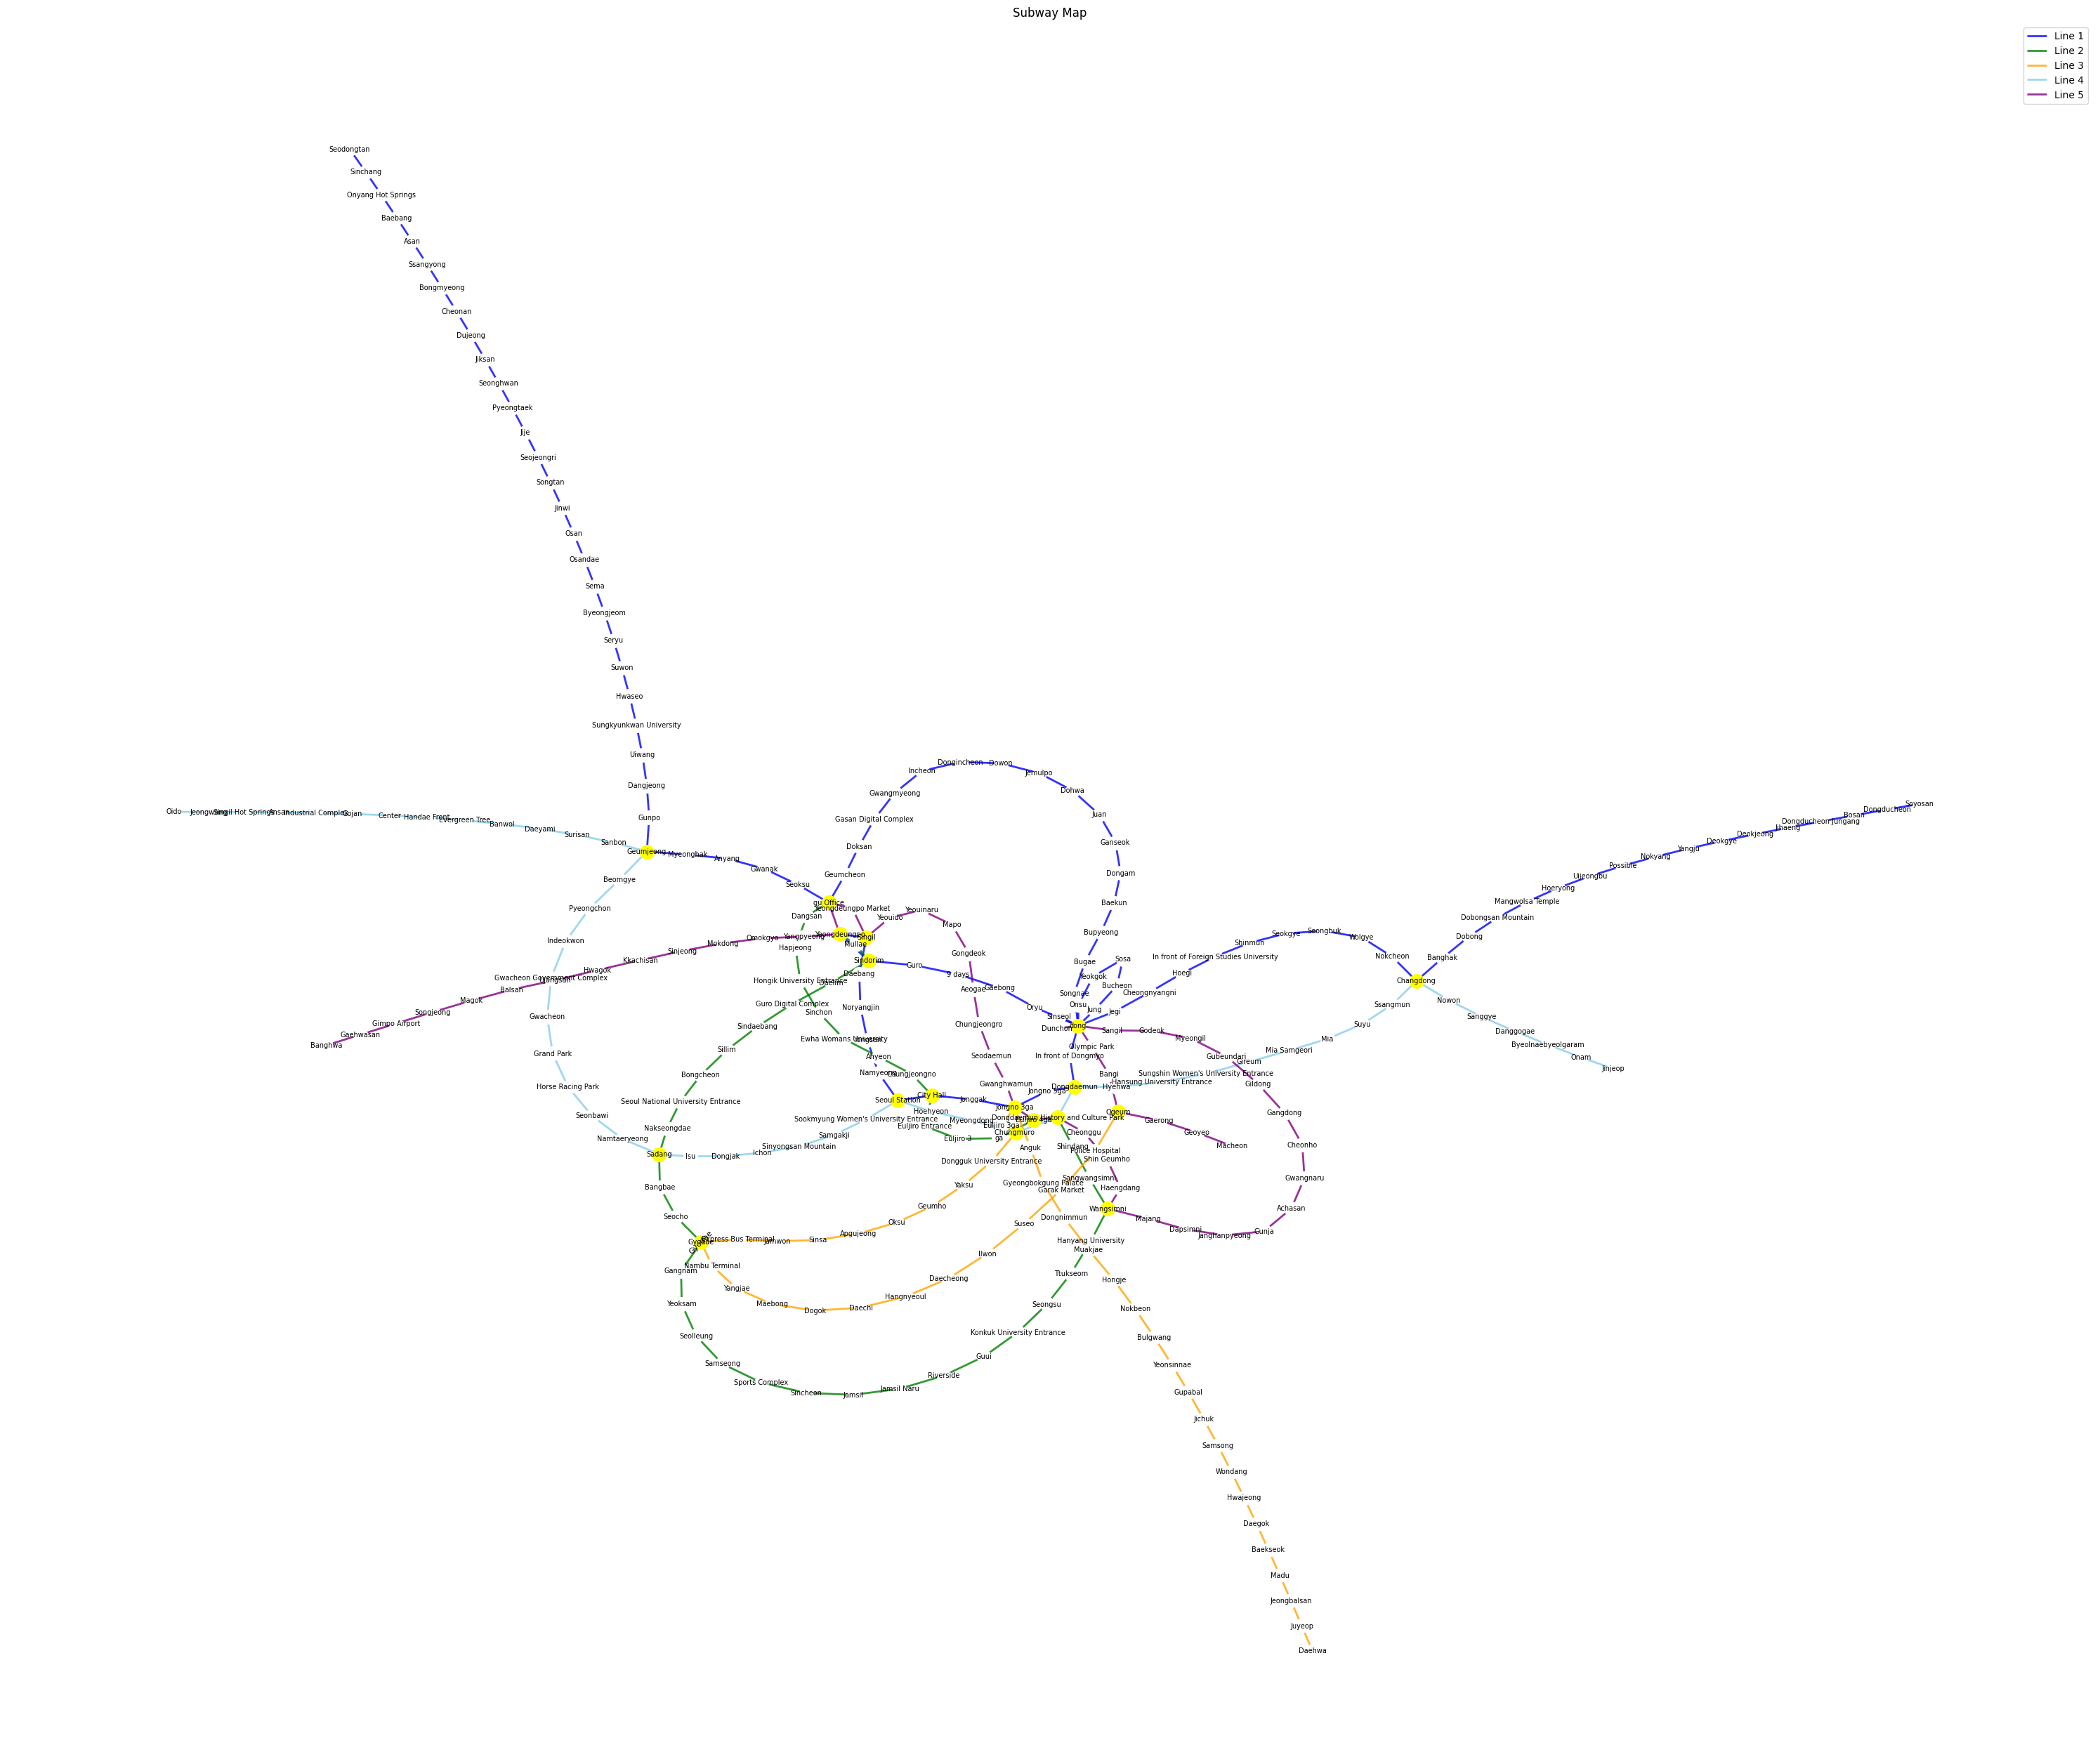

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# 파일에서 각 노선 데이터 읽어오기
subway_lines = []
for i in range(1, 6):
    with open(f'{i}호선 영어 노선.txt', 'r',encoding='utf-8') as file:
        line = [station.strip() for station in file.read().split('-')]
        subway_lines.append(line)

station_lines = {}
for i, line in enumerate(subway_lines):
    for station in line:
        if station not in station_lines:
            station_lines[station] = []
        station_lines[station].append(i + 1)

G = nx.Graph()

# 각 노선 데이터를 그래프에 추가
for i, line in enumerate(subway_lines):
    for j in range(len(line) - 1):
        G.add_edge(line[j], line[j + 1], line=i + 1)

T = nx.minimum_spanning_tree(G)

# 노선별로 색상 지정(실제 지하철 노선 참고)
line_colors = {1: 'b', 2: 'g', 3: 'orange', 4: 'skyblue', 5: 'purple'}

# 환승 역 찾기
transfers = set()
for station, lines in station_lines.items():
    if len(lines) > 1:  # 환승역 판단
        transfers.add(station)

plt.figure(figsize=(30, 25))
pos = nx.kamada_kawai_layout(G)

# 역 이름 표시
nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')

# Gyodae 위치 지정(치우침 방지)
gyodae_pos = pos['Gyodae']
gyodae_x, gyodae_y = gyodae_pos[0], gyodae_pos[1]

# Gyodae를 중앙에 배치
plt.text(gyodae_x, gyodae_y, 'Gyodae', fontsize=8, ha='center', va='center', rotation=45, color='black')

# 역 표시
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='white')

# 환승 역 표시
nx.draw_networkx_nodes(T, pos, nodelist=transfers, node_size=200, node_color='yellow')

# 각 노선에 따라 엣지 그리기
for line, color in line_colors.items():
    edges = [(u, v) for u, v, l in G.edges(data='line') if l == line]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=2.0, alpha=0.8, label=f'Line {line}')

# 엣지 간의 간격 조정
plt.tight_layout()

plt.title('Subway Map')
plt.legend()
plt.axis('off')
plt.show()


## **2. Subway Shortest Path Search Algorithms**

2.1 Dijkstra algorithm - 정아림

2.2 BFS algorithm - 김민아

2.3 A* algorithm - 나영서

2.4 Bellman-Fold algorithm - 나영서



### 2.1 Dijkstra algorithm - 정아림

- 최소거리(최단시간) 구현

------

그래프에 음수 가중치를 인정하지 않음에 적합하여 선택.

알고리즘을 구현에 S라는 집합과 distance라는 배열이 필요.

집합 S는 최단 경로가 발견된 정점 집합으로, 최단 경로를 찾고 있는 그래프 G의 정접 집합 V(G)와 같아질 때까지 커지며, 어떤 정점 v를 인덱스로 하는 distance[v] 값은 출발 정점에서 집합 S에 있는 정점만 거쳐 목적지 v에 도달하는 경로 길이를 의미.

In [6]:
from networkx.algorithms.shortest_paths.generic import *
from networkx.algorithms.shortest_paths.unweighted import *
from networkx.algorithms.shortest_paths.weighted import *
from networkx.algorithms.shortest_paths.astar import *
from networkx.algorithms.shortest_paths.dense import *

# 호선별로 저장한 txt 파일 불러오기 및 저장
subway_file1 = open('1호선.txt', 'r') # 'r'은 읽기모드
subway_file2 = open('2호선.txt', 'r')
subway_file3 = open('3호선.txt', 'r')
subway_file4 = open('4호선.txt', 'r')
subway_file5 = open('5호선.txt', 'r')

# 각 노선별로 list로 저장
subway_list_line1 = subway_file1.read().split(' - ')
subway_list_line2 = subway_file2.read().split(' - ')
subway_list_line3 = subway_file3.read().split(' - ')
subway_list_line4 = subway_file4.read().split(' - ')
subway_list_line5 = subway_file5.read().split(' - ')

# 노선 내에 공백 제거(list, 지하철 노선)
subway_line1 = [i.strip() for i in subway_list_line1]
subway_line2 = [i.strip() for i in subway_list_line2]
subway_line3 = [i.strip() for i in subway_list_line3]
subway_line4 = [i.strip() for i in subway_list_line4]
subway_line5 = [i.strip() for i in subway_list_line5]

# 지하철 수
subway_num1 = [i for i in range(1, len(subway_line1))]
subway_num2 = [i for i in range(1, len(subway_line2))]
subway_num3 = [i for i in range(1, len(subway_line3))]
subway_num4 = [i for i in range(1, len(subway_line4))]
subway_num5 = [i for i in range(1, len(subway_line5))]

# 나중에 출력 + 비교 쉽게하기 위해 만듦(dictionary)
subway_dict_line1 = dict(zip(subway_line1, subway_num1))
subway_dict_line2 = dict(zip(subway_line2, subway_num2))
subway_dict_line3 = dict(zip(subway_line3, subway_num3))
subway_dict_line4 = dict(zip(subway_line4, subway_num4))
subway_dict_line5 = dict(zip(subway_line5, subway_num5))

subway_dict_line1['line']=1
subway_dict_line2['line']=2
subway_dict_line3['line']=3
subway_dict_line4['line']=4
subway_dict_line5['line']=5

print(subway_dict_line1)
print(subway_dict_line2)
print(subway_dict_line3)
print(subway_dict_line4)
print(subway_dict_line5)

{'소요산': 1, '동두천': 2, '보산': 3, '동두천중앙': 4, '지행': 5, '덕정': 6, '덕계': 7, '양주': 8, '녹양': 9, '가능': 10, '의정부': 11, '회룡': 12, '망월사': 13, '도봉산': 14, '도봉': 15, '방학': 16, '창동': 17, '녹천': 18, '월계': 19, '성북': 20, '석계': 21, '신이문': 22, '외대앞': 23, '회기': 24, '청량리': 25, '제기동': 26, '신설동': 27, '동묘앞': 28, '동대문': 29, '종로5가': 30, '종로3가': 31, '종각': 32, '시청': 33, '서울역': 34, '남영': 35, '용산': 36, '노량진': 37, '대방': 38, '신길': 39, '영등포': 40, '신도림': 41, '구로': 42, '구일': 43, '개봉': 44, '오류동': 45, '온수': 46, '역곡': 47, '소사': 48, '부천': 49, '중동': 50, '송내': 51, '부개': 52, '부평': 53, '백운': 54, '동암': 55, '간석': 56, '주안': 57, '도화': 58, '제물포': 59, '도원': 60, '동인천': 61, '인천': 62, '광명': 63, '가산디지털단지': 64, '독산': 65, '금천구청': 66, '석수': 67, '관악': 68, '안양': 69, '명학': 70, '금정': 71, '군포': 72, '당정': 73, '의왕': 74, '성균관대': 75, '화서': 76, '수원': 77, '세류': 78, '병점': 79, '세마': 80, '오산대': 81, '오산': 82, '진위': 83, '송탄': 84, '서정리': 85, '지제': 86, '평택': 87, '성환': 88, '직산': 89, '두정': 90, '천안': 91, '봉명': 92, '쌍용': 93, '아산': 94, '배방': 95, '온양온천': 96, '신창': 97,

In [52]:
import networkx as nx
import time
import heapq

lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

G = nx.Graph()

def dijkstra(G, start, end):
    # 거리 정보를 무한대로 초기화
    distances = {vertex: float('infinity') for vertex in G.nodes}
    # 시작 노드의 거리는 0
    distances[start] = 0

    # 우선순위 큐 초기화
    priority_queue = [(0, start)]
    path = {}

    while priority_queue:
        # 현재 노드와 거리 가져오기
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # 이미 처리된 노드는 무시
        if current_distance > distances[current_vertex]:
            continue

        # 이웃한 노드 처리
        for neighbor, weight in G[current_vertex].items():
            distance = current_distance + weight['weight']

            # 더 짧은 경로를 찾은 경우 업데이트
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                path[neighbor] = current_vertex

    # 최단 경로 재구성
    shortest_path = []
    current_node = end
    while current_node != start:
        shortest_path.append(current_node)
        current_node = path[current_node]
    shortest_path.append(start)
    shortest_path.reverse()

    return shortest_path, distances[end]

# 역들 사이의 연결 추가(소요시간 = 2 min)
for line, stations in lines.items():
    for i in range(len(stations)-1):
        G.add_edge((line, stations[i]), (line, stations[i+1]), weight=2)

# 환승 역 찾기
transfer_stations = {}
for line, stations in lines.items():
    for station in stations:
        if station not in transfer_stations:
            transfer_stations[station] = []
        transfer_stations[station].append(line)

# 환승 역에 환승 시간 추가 (환승시간 = 2 min)
for station, lines in transfer_stations.items():
    if len(lines) > 1:
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                G.add_edge((lines[i], station), (lines[j], station), weight=2)

# 최단 경로에서 환승 정보 포함해 출력
def print_path_with_transfers(path):
    path_str = ""
    transfer_info = []

    # 환승 여부 확인
    for i in range(len(path) - 1):
        current_station, next_station = path[i], path[i+1]
        current_line, next_line = current_station[0], next_station[0]

        # 노선이 바뀌는 지점(환승) 확인
        if current_line != next_line:
            transfer_info.append((current_line, next_line, current_station[1]))

        path_str += f"({current_station[0]},{current_station[1]}) -> "

    # 마지막 역 추가
    path_str += f"({path[-1][0]},{path[-1][1]})"

    print("최단 경로:", path_str)

    for transfer in transfer_info:
        print(f"환승 정보: {transfer[2]}에서 {transfer[0]}호선에서 {transfer[1]}호선으로 환승하기")

# Dijkstra 알고리즘으로 최단 경로 찾기
start_station = ('1', '소요산')
end_station = ('5', '마천')

#시작시간 측정
dijkstra_start_time = time.time()

shortest_path, shortest_path_length = dijkstra(G, start_station, end_station)
print_path_with_transfers(shortest_path)
#종료시간 측정
dijkstra_end_time = time.time()

dijkstra_total_time = dijkstra_end_time - dijkstra_start_time

print("이동 시간:",shortest_path_length,"분")
print("실행 시간: {:.4f}초".format(dijkstra_total_time))

최단 경로: (1,소요산) -> (1,동두천) -> (1,보산) -> (1,동두천중앙) -> (1,지행) -> (1,덕정) -> (1,덕계) -> (1,양주) -> (1,녹양) -> (1,가능) -> (1,의정부) -> (1,회룡) -> (1,망월사) -> (1,도봉산) -> (1,도봉) -> (1,방학) -> (1,창동) -> (4,창동) -> (4,쌍문) -> (4,수유) -> (4,미아) -> (4,미아삼거리) -> (4,길음) -> (4,성신여대입구) -> (4,한성대입구) -> (4,혜화) -> (4,동대문) -> (4,동대문역사문화공원) -> (2,동대문역사문화공원) -> (2,신당) -> (2,상왕십리) -> (2,왕십리) -> (5,왕십리) -> (5,마장) -> (5,답십리) -> (5,장한평) -> (5,군자) -> (5,아차산) -> (5,광나루) -> (5,천호) -> (5,강동) -> (5,길동) -> (5,굽은다리) -> (5,명일) -> (5,고덕) -> (5,상일동) -> (5,둔촌동) -> (5,올림픽공원) -> (5,방이) -> (5,오금) -> (5,개롱) -> (5,거여) -> (5,마천)
환승 정보: 창동에서 1호선에서 4호선으로 환승하기
환승 정보: 동대문역사문화공원에서 4호선에서 2호선으로 환승하기
환승 정보: 왕십리에서 2호선에서 5호선으로 환승하기
이동 시간: 104 분
실행 시간: 0.0037초


### 2.2 BFS algorithm - 김민아

- 최단거리(최소시간) 구현

------

루트 노드(혹은 다른 임의의 노드)에서 시작해서 인접한 노드를 먼저 탐색하는 방법시작 정점으로부터 가까운 정점을 먼저 방문하고 멀리 떨어져 있는 정점을 나중에 방문하는 순회 방법.

두 노드 사이의 최단 경로 혹은 임의의 경로를 찾고 싶을 때 사용.

In [54]:
import os
from collections import deque
import time

def read_subway_lines(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f.read().split(' - ')]

# 노선 데이터
subway_line1 = read_subway_lines('1호선.txt')
subway_line2 = read_subway_lines('2호선.txt')
subway_line3 = read_subway_lines('3호선.txt')
subway_line4 = read_subway_lines('4호선.txt')
subway_line5 = read_subway_lines('5호선.txt')

subway_lines = {
    '1': subway_line1,
    '2': subway_line2,
    '3': subway_line3,
    '4': subway_line4,
    '5': subway_line5
}

# 지하철 노선 정보를 기반으로 그래프 생성
def build_graph(subway_lines):
    graph = {}
    for line, stations in subway_lines.items():
        for i, station in enumerate(stations):
            if station not in graph:
                graph[station] = []
            if i > 0:
                graph[station].append((stations[i-1], line))
            if i < len(stations) - 1:
                graph[station].append((stations[i+1], line))
    return graph

# BFS를 사용하여 최단 경로 찾기
def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([([start], None, 0)])

    while queue:
        path, prev_line, total_time = queue.popleft()
        current = path[-1][0] if isinstance(path[-1], tuple) else path[-1]

        if current == goal:
            return path, total_time

        for item in graph[current]:
            next_station, line = item
            if next_station not in visited or (next_station in visited and line != prev_line):
                visited.add(next_station)
                new_path = list(path)
                new_path.append((next_station, line))
                if line == prev_line or prev_line is None:
                    queue.append((new_path, line, total_time + 2))
                else:
                    queue.append((new_path, line, total_time + 4))
    return [], 0

# 경로 출력
def print_route_with_correct_line(route):
    for item in route:
        if isinstance(item, tuple):
            station, line = item
            print(f"({line},{station})")
        else:
            print(f"{item} (시작점)")

# 경로 계산 및 출력하는 함수
def calculate_route(start_station, end_station, subway_lines):
    graph = build_graph(subway_lines)
    route, total_time = bfs_shortest_path(graph, start_station, end_station)

    if route:
        print_route_with_correct_line(route)
        print("총 소요 시간:", total_time, "분")
    else:
        print("경로를 찾을 수 없습니다.")

# 사용 예
dfs_start_time = time.time()
start_station = '소요산'
end_station = '마천'
calculate_route(start_station, end_station, subway_lines)

dfs_end_time = time.time()
dfs_total_time = dfs_end_time - dfs_start_time

print("실행 시간: {:.4f}초".format(dfs_total_time))

소요산 (시작점)
(1,동두천)
(1,보산)
(1,동두천중앙)
(1,지행)
(1,덕정)
(1,덕계)
(1,양주)
(1,녹양)
(1,가능)
(1,의정부)
(1,회룡)
(1,망월사)
(1,도봉산)
(1,도봉)
(1,방학)
(1,창동)
(4,쌍문)
(4,수유)
(4,미아)
(4,미아삼거리)
(4,길음)
(4,성신여대입구)
(4,한성대입구)
(4,혜화)
(4,동대문)
(4,동대문역사문화공원)
(2,신당)
(2,상왕십리)
(2,왕십리)
(5,마장)
(5,답십리)
(5,장한평)
(5,군자)
(5,아차산)
(5,광나루)
(5,천호)
(5,강동)
(5,길동)
(5,굽은다리)
(5,명일)
(5,고덕)
(5,상일동)
(5,둔촌동)
(5,올림픽공원)
(5,방이)
(5,오금)
(5,개롱)
(5,거여)
(5,마천)
총 소요 시간: 104 분
실행 시간: 3.6404초


### 2.3 A* algorithm - 나영서

- 최단거리(최소시간) 구현

-------

A*는 시작점과 목표점이 정해지면 두 개의 최단 거리를 구함.

하나의 정점에서부터 다른 하나의 정점까지의 최단 경로를 구하는 경우 A* 알고리즘이 적합하기에 사용함.

In [62]:
import heapq
import time

def read_subway_lines(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f.read().split(' - ')]

# 노선 데이터
subway_line1 = read_subway_lines('1호선.txt')
subway_line2 = read_subway_lines('2호선.txt')
subway_line3 = read_subway_lines('3호선.txt')
subway_line4 = read_subway_lines('4호선.txt')
subway_line5 = read_subway_lines('5호선.txt')

lines = [subway_line1, subway_line2, subway_line3, subway_line4, subway_line5]
line_numbers = [1, 2, 3, 4, 5]

# 그래프와 역-노선 매핑 구성
graph = {}
station_to_lines = {}

for line_number, line in zip(line_numbers, lines):
    for i in range(len(line)):
        station = (line_number, line[i])
        if station not in graph:
            graph[station] = []
        if i > 0:
            prev_station = (line_number, line[i-1])
            graph[station].append((prev_station, 2))  # 이동 시간 2분
            graph[prev_station].append((station, 2))
        if line[i] not in station_to_lines:
            station_to_lines[line[i]] = []
        station_to_lines[line[i]].append(line_number)

# 환승 정보 추가
for station_name, line_numbers in station_to_lines.items():
    if len(line_numbers) > 1:
        for i in range(len(line_numbers)):
            for j in range(i + 1, len(line_numbers)):
                graph[(line_numbers[i], station_name)].append(((line_numbers[j], station_name), 2))
                graph[(line_numbers[j], station_name)].append(((line_numbers[i], station_name), 2))

# A* 알고리즘 구현
def astar(graph, start, end):
    queue = [(0, 0, start)]  # 총 시간, 환승 횟수, 현재 노드
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_total_time, current_transfers, current_node = heapq.heappop(queue)

        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path = path[::-1]
            return current_total_time, current_transfers, path

        for neighbor, weight in graph[current_node]:
            total_time = current_total_time + weight
            transfers = current_transfers + (neighbor[0] != current_node[0])  # 환승 횟수 업데이트
            priority = total_time + transfers  # 휴리스틱 함수

            if total_time < distances[neighbor] or (total_time == distances[neighbor] and transfers < current_transfers):
                distances[neighbor] = total_time
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (total_time, transfers, neighbor))

# 시작 역과 도착 역 지정
start_station = (1, '소요산')
end_station = (5, '마천')

# 최단 경로 및 환승 횟수 찾기
astar_start_time = time.time()
shortest_time, transfers, path = astar(graph, start_station, end_station)
astar_end_time = time.time()

astar_total_time = astar_end_time - astar_start_time

# 경로 출력
path_str = " -> ".join([f"({line}, {station})" for line, station in path])
print(f"최단 경로의 시간: {shortest_time}분")
print(f"환승 횟수: {transfers}")
print(f"이동 경로: {path_str}")
print("실행 시간: {:.4f}초".format(astar_total_time))

최단 경로의 시간: 104분
환승 횟수: 3
이동 경로: (1, 소요산) -> (1, 동두천) -> (1, 보산) -> (1, 동두천중앙) -> (1, 지행) -> (1, 덕정) -> (1, 덕계) -> (1, 양주) -> (1, 녹양) -> (1, 가능) -> (1, 의정부) -> (1, 회룡) -> (1, 망월사) -> (1, 도봉산) -> (1, 도봉) -> (1, 방학) -> (1, 창동) -> (4, 창동) -> (4, 쌍문) -> (4, 수유) -> (4, 미아) -> (4, 미아삼거리) -> (4, 길음) -> (4, 성신여대입구) -> (4, 한성대입구) -> (4, 혜화) -> (4, 동대문) -> (4, 동대문역사문화공원) -> (2, 동대문역사문화공원) -> (2, 신당) -> (2, 상왕십리) -> (2, 왕십리) -> (5, 왕십리) -> (5, 마장) -> (5, 답십리) -> (5, 장한평) -> (5, 군자) -> (5, 아차산) -> (5, 광나루) -> (5, 천호) -> (5, 강동) -> (5, 길동) -> (5, 굽은다리) -> (5, 명일) -> (5, 고덕) -> (5, 상일동) -> (5, 둔촌동) -> (5, 올림픽공원) -> (5, 방이) -> (5, 오금) -> (5, 개롱) -> (5, 거여) -> (5, 마천)
실행 시간: 0.0033초


### 2.4 Bellman-Fold algorithm - 나영서

- 최단거리(최소시간), 최소환승 구현

--------

양방향의 거리 동일, 모두 이동 가능 -> Undirected graph

Fold algorithm은 목적지까지 가는 길에 더 가까운 경로를 발견하면, 최단 경로를 더 가까운 경로로 계속 대체하여 길찾는 알고리즘.

매 단계마다 모든 노드간의 최단 거리를 구함.

In [63]:
import heapq
import time

# 노선 데이터 읽기
def read_subway_lines(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f.read().split(' - ')]

# 노선 데이터
subway_line1 = read_subway_lines('1호선.txt')
subway_line2 = read_subway_lines('2호선.txt')
subway_line3 = read_subway_lines('3호선.txt')
subway_line4 = read_subway_lines('4호선.txt')
subway_line5 = read_subway_lines('5호선.txt')

lines = [subway_line1, subway_line2, subway_line3, subway_line4, subway_line5]
line_numbers = [1, 2, 3, 4, 5]

# 그래프와 역-노선 매핑 구성
graph = {}
station_to_lines = {}

for line_number, line in zip(line_numbers, lines):
    for i in range(len(line)):
        station = (line_number, line[i])
        if station not in graph:
            graph[station] = []
        if i > 0:
            prev_station = (line_number, line[i-1])
            graph[station].append((prev_station, 2))  # 이동 시간 2분
            graph[prev_station].append((station, 2))
        if line[i] not in station_to_lines:
            station_to_lines[line[i]] = []
        station_to_lines[line[i]].append(line_number)

# 환승 정보 추가
for station_name, line_numbers in station_to_lines.items():
    if len(line_numbers) > 1:
        for i in range(len(line_numbers)):
            for j in range(i + 1, len(line_numbers)):
                graph[(line_numbers[i], station_name)].append(((line_numbers[j], station_name), 2))
                graph[(line_numbers[j], station_name)].append(((line_numbers[i], station_name), 2))

# Fold 알고리즘 구현
def fold_algorithm(graph, start, end):
    # 초기화
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    transfer_count = {node: 0 for node in graph}  # 환승 횟수 기록

    # Fold
    for node in graph:
        for neighbor, weight in graph[node]:
            if distances[node] + weight < distances[neighbor]:
                distances[neighbor] = distances[node] + weight
                previous_nodes[neighbor] = node
                # 환승할 때마다 환승 횟수를 1 증가시킴
                if node[0] != neighbor[0]:
                    transfer_count[neighbor] = transfer_count[node] + 1
                else:
                    transfer_count[neighbor] = transfer_count[node]

    # 경로 추적
    path = []
    current_node = end
    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path = path[::-1]

    return distances[end], transfer_count[end], path

# 시작 역과 도착 역 지정
start_station = (1, '소요산')
end_station = (5, '마천')

# 최단 경로 및 최소 환승 횟수 찾기
fold_start_time = time.time()
shortest_distance, min_transfer_count, path = fold_algorithm(graph, start_station, end_station)
fold_end_time = time.time()

fold_total_time = fold_end_time - fold_start_time

# 경로 출력
path_str = " -> ".join([f"({line}, {station})" for line, station in path])
print(f"최단 경로의 시간: {shortest_distance}분")
print(f"최소 환승 횟수: {min_transfer_count}회")
print(f"이동 경로: {path_str}")
print("실행 시간: {:.4f}초".format(fold_total_time))

최단 경로의 시간: 104분
최소 환승 횟수: 2회
이동 경로: (1, 소요산) -> (1, 동두천) -> (1, 보산) -> (1, 동두천중앙) -> (1, 지행) -> (1, 덕정) -> (1, 덕계) -> (1, 양주) -> (1, 녹양) -> (1, 가능) -> (1, 의정부) -> (1, 회룡) -> (1, 망월사) -> (1, 도봉산) -> (1, 도봉) -> (1, 방학) -> (1, 창동) -> (4, 창동) -> (4, 쌍문) -> (4, 수유) -> (4, 미아) -> (4, 미아삼거리) -> (4, 길음) -> (4, 성신여대입구) -> (4, 한성대입구) -> (4, 혜화) -> (4, 동대문) -> (4, 동대문역사문화공원) -> (5, 동대문역사문화공원) -> (5, 청구) -> (5, 신금호) -> (5, 행당) -> (5, 왕십리) -> (5, 마장) -> (5, 답십리) -> (5, 장한평) -> (5, 군자) -> (5, 아차산) -> (5, 광나루) -> (5, 천호) -> (5, 강동) -> (5, 길동) -> (5, 굽은다리) -> (5, 명일) -> (5, 고덕) -> (5, 상일동) -> (5, 둔촌동) -> (5, 올림픽공원) -> (5, 방이) -> (5, 오금) -> (5, 개롱) -> (5, 거여) -> (5, 마천)
실행 시간: 0.0009초


#### 실행시간 비교

In [65]:
print("Dijkstra 실행 시간: {:.4f}초".format(dijkstra_total_time))
print("DFS 실행 시간: {:.4f}초".format(dfs_total_time))
print("A* 실행 시간: {:.4f}초".format(astar_total_time))
print("Bellman-Fold실행 시간: {:.4f}초".format(fold_total_time))

Dijkstra 실행 시간: 0.0037초
DFS 실행 시간: 3.6404초
A* 실행 시간: 0.0033초
Bellman-Fold실행 시간: 0.0009초


이번 Team Project는 git을 사용해 협업했다.

https://github.com/Nayeongseo/data-structure-and-algorithm-Team-Project/tree/main

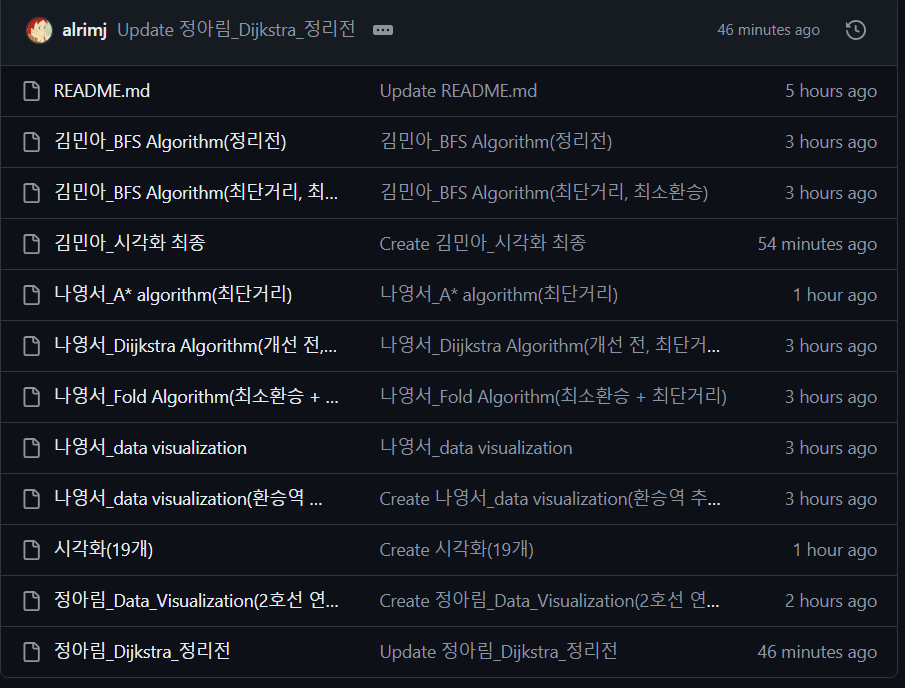